# VAE+PE 

## Train VAE

In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np

from starccato_jax.data import load_data
import matplotlib.pyplot as plt
import os

HERE = os.getcwd()
model_savedir = f"{HERE}/model_out"

train_data, val_data = load_data()

plt.figure(figsize=(3, 2.5))
for i in range(100):
    plt.plot(train_data[i], color='k', lw=0.3, alpha=0.2);
plt.savefig(f"{model_savedir}/training_data.png")


![](model_out/training_data.png)

Epoch 0: Train Loss = 1.0900, Val Loss = 0.8432
Epoch 100: Train Loss = 0.5139, Val Loss = 0.4606
Epoch 200: Train Loss = 0.4879, Val Loss = 0.4394
Epoch 300: Train Loss = 0.4738, Val Loss = 0.4283
Epoch 400: Train Loss = 0.4607, Val Loss = 0.4163
Epoch 500: Train Loss = 0.4843, Val Loss = 0.4429
Model saved to /Users/avaj0001/Documents/projects/starccato_jax/docs/model_out/MODEL
Losses saved to /Users/avaj0001/Documents/projects/starccato_jax/docs/model_out/losses.txt
Training complete.


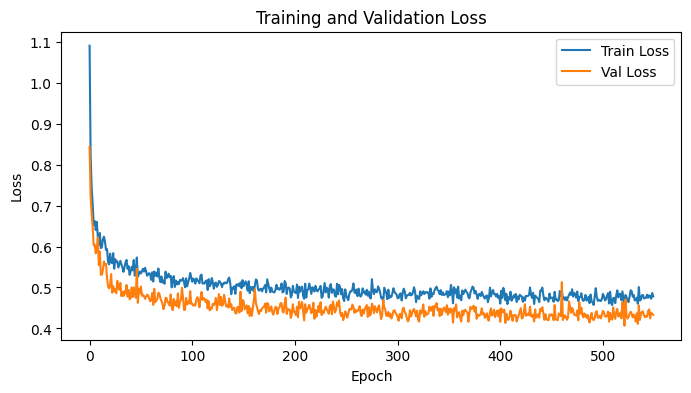

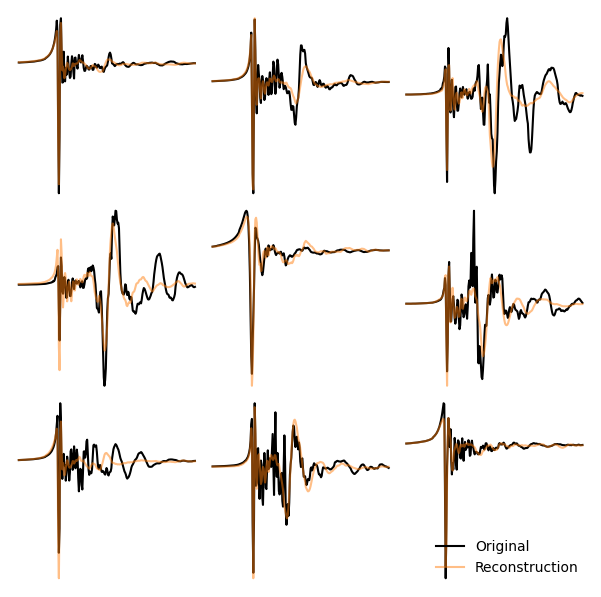

In [27]:
from starccato_jax.trainer import train_vae

LATENT_DIM = 20

train_vae(train_data, val_data, n_epochs=550, batch_size=32, latent_dim=LATENT_DIM, save_dir=model_savedir)

| Loss | Reconstruction|
|---|---|
|![loss]| ![reconstructions] | 

[loss]: model_out/loss.png
[reconstructions]: model_out/reconstructions.png

/Users/avaj0001/Documents/projects/venvs/starccato_jax/lib/python3.11/site-packages/orbax/checkpoint/_src/serialization/type_handlers.py:1175: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


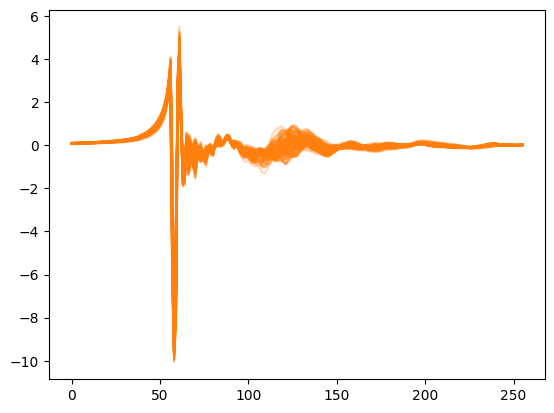

In [28]:
from starccato_jax.trainer import load_model
from starccato_jax.model import generate
import jax

zs = jax.random.uniform(jax.random.PRNGKey(0), (100, LATENT_DIM))

generated_signal = generate(*load_model(model_savedir), z=zs)
for i in range(100):
    plt.plot(generated_signal[i], color='tab:orange', alpha=0.3)

## MCMC on one validation dataset

/Users/avaj0001/Documents/projects/venvs/starccato_jax/lib/python3.11/site-packages/orbax/checkpoint/_src/serialization/type_handlers.py:1175: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(
/Users/avaj0001/Documents/projects/starccato_jax/src/starccato_jax/sampler.py:41: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=2000, num_chains=nchains, p

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
z[0]   0.470  0.292   0.009    0.946      0.004    0.003    6277.0    2609.0   
z[1]   0.316  0.254   0.000    0.812      0.004    0.003    5658.0    2543.0   
z[2]   0.091  0.094   0.000    0.261      0.001    0.001    3254.0    1465.0   
z[3]   0.249  0.088   0.060    0.391      0.002    0.002    1821.0    1013.0   
z[4]   0.351  0.269   0.000    0.854      0.004    0.003    5748.0    2373.0   
z[5]   0.662  0.262   0.164    1.000      0.004    0.003    5173.0    2573.0   
z[6]   0.609  0.284   0.101    1.000      0.005    0.003    3814.0    2581.0   
z[7]   0.221  0.208   0.000    0.627      0.003    0.003    5173.0    1979.0   
z[8]   0.284  0.242   0.000    0.763      0.004    0.003    6131.0    2360.0   
z[9]   0.748  0.218   0.322    1.000      0.003    0.002    6476.0    2310.0   
z[10]  0.710  0.242   0.229    1.000      0.004    0.003    4703.0    2315.0   
z[11]  0.446  0.288   0.000    0.918    

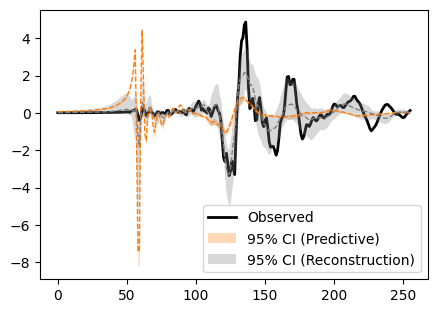

In [29]:
from starccato_jax.sampler import sample_latent_vars_given_data

mcmc_out = sample_latent_vars_given_data(train_data[1], model_savedir, rng_int=0, outdir=f"{HERE}/out_mcmc2")

It’s always a good idea to check the convergence of your MCMC sampler, and we’ll use ArviZ to do that here, looking at the Gelman–Rubin (r_hat) statistic, and the effective sample sizes (e.g. ess_bulk):

In [14]:
import arviz as az

inf_data = az.from_numpyro(mcmc_out)
az.summary(inf_data, var_names=['z'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z[0],0.665,0.255,0.167,1.000,0.004,0.003,4032.0,2538.0,1.0
z[1],0.691,0.255,0.191,1.000,0.004,0.003,3499.0,2218.0,1.0
z[2],0.371,0.257,0.001,0.836,0.004,0.003,3778.0,2524.0,1.0
z[3],0.937,0.064,0.821,1.000,0.001,0.001,4269.0,1812.0,1.0
z[4],0.930,0.063,0.813,1.000,0.001,0.001,3241.0,1865.0,1.0
z[5],0.245,0.215,0.000,0.671,0.003,0.003,3919.0,1991.0,1.0
z[6],0.232,0.208,0.000,0.634,0.004,0.004,3176.0,1761.0,1.0
z[7],0.513,0.285,0.061,0.994,0.004,0.003,4266.0,1838.0,1.0
z[8],0.397,0.282,0.001,0.905,0.005,0.004,4029.0,2473.0,1.0
z[9],0.333,0.259,0.000,0.823,0.004,0.004,3750.0,2122.0,1.0


|        | |
|--------|--|
| Trace  | ![trace_plot][trace_plot] |
| Corner | ![corner_plot][corner_plot] |
| CI     | ![ci_plot][ci_plot] |


[ci_plot]: out_mcmc/ci_plot.png
[corner_plot]: out_mcmc/corner_plot.png
[trace_plot]: out_mcmc/trace_plot.png

## Exploring better number of Z


In [ ]:
from starccato_jax.trainer import train_vae

for z_size in [4, 8, 12, 16, 20]:
    train_vae(train_data, val_data, latent_dim=z_size, n_epochs=200,
              save_dir=f"{HERE}/model_exploration/model_z{z_size}"
              )

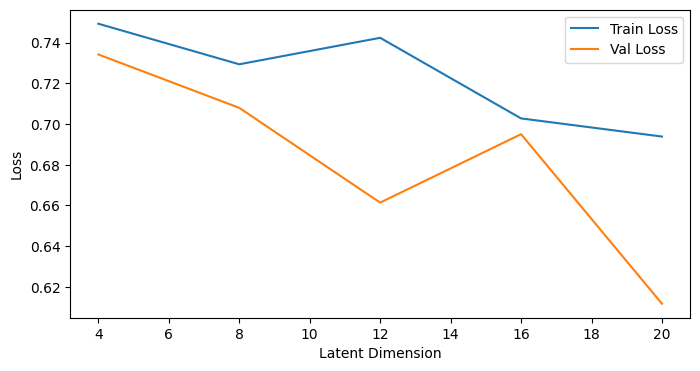

In [9]:
z_sizes = [4, 8, 12, 16, 20]

train_losses, val_losses  = [], []
for z_size in z_sizes:
    # read the losses
    loss_fpath = f"{HERE}/model_exploration/model_z{z_size}/losses.txt"
    data = np.loadtxt(loss_fpath)
    train_losses.append(data[-1, 0])
    val_losses.append(data[-1, 1])



## PLOT
plt.figure(figsize=(8, 4))
plt.plot(z_sizes, train_losses, label="Train Loss")
plt.plot(z_sizes, val_losses, label="Val Loss")
plt.xlabel('Latent Dimension')
plt.ylabel('Loss')
plt.title("Loss at 200 epochs")
plt.legend()



At 500 epochs:



![](model_exploration/loss_vs_z.png)